# <font color='violet'> Data Wrangling

Before doing any work with psychedelic experience reports, I need to create a predictive model using labeled data from formal studies of the effects of prescription psych meds. Several studies' results will be combined here to form one large dataset with which to build a model. Data comes from the following sources:
    
    - https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Druglib.com%29
    - https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29
    - https://www.askapatient.com/store/#!/Psytar-Data-Set/p/449080512/category=129206256


In [1]:
# ! pip install pandas
# ! pip install matplotlib
# ! pip install seaborn
# ! pip install sqlalchemy

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Concatenate two sets from drugs.com 
drugs_dotcom_train = pd.read_csv('../data/raw/drugsComTrain_raw.tsv', sep='\t')
drugs_dotcom_test = pd.read_csv('../data/raw/drugsComTest_raw.tsv', sep='\t')

print(drugs_dotcom_test.columns, drugs_dotcom_train.columns, drugs_dotcom_test.shape, 
      drugs_dotcom_train.shape)

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object') Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object') (53766, 7) (161297, 7)


In [4]:
drugs_dotcom = pd.concat([drugs_dotcom_test, drugs_dotcom_train])
drugs_dotcom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   215063 non-null  int64  
 1   drugName     215063 non-null  object 
 2   condition    213869 non-null  object 
 3   review       215063 non-null  object 
 4   rating       215063 non-null  float64
 5   date         215063 non-null  object 
 6   usefulCount  215063 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 13.1+ MB


In [5]:
# Do the same with data from druglib
druglib_train = pd.read_csv('../data/raw/drugLibTrain_raw.tsv', sep='\t')
druglib_test = pd.read_csv('../data/raw/drugLibTest_raw.tsv', sep='\t')

print(druglib_train.columns, druglib_test.columns, druglib_train.shape, druglib_test.shape)

Index(['Unnamed: 0', 'urlDrugName', 'rating', 'effectiveness', 'sideEffects',
       'condition', 'benefitsReview', 'sideEffectsReview', 'commentsReview'],
      dtype='object') Index(['Unnamed: 0', 'urlDrugName', 'rating', 'effectiveness', 'sideEffects',
       'condition', 'benefitsReview', 'sideEffectsReview', 'commentsReview'],
      dtype='object') (3107, 9) (1036, 9)


In [6]:
druglib = pd.concat([druglib_train, druglib_test])
druglib.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4143 entries, 0 to 1035
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         4143 non-null   int64 
 1   urlDrugName        4143 non-null   object
 2   rating             4143 non-null   int64 
 3   effectiveness      4143 non-null   object
 4   sideEffects        4143 non-null   object
 5   condition          4142 non-null   object
 6   benefitsReview     4143 non-null   object
 7   sideEffectsReview  4141 non-null   object
 8   commentsReview     4135 non-null   object
dtypes: int64(2), object(7)
memory usage: 323.7+ KB


In [7]:
# Finally, import from psytar
psytar = pd.read_csv('../data/raw/PsyTAR_dataset_samples.csv')
psytar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            891 non-null    int64  
 1   comment_index    891 non-null    int64  
 2   comment_id       891 non-null    int64  
 3   drug_id          891 non-null    object 
 4   rating           891 non-null    int64  
 5   disorder         891 non-null    object 
 6   side-effect      877 non-null    object 
 7   comment          768 non-null    object 
 8   gender           881 non-null    object 
 9   age              879 non-null    float64
 10  dosage_duration  888 non-null    object 
 11  date             891 non-null    object 
 12  category         891 non-null    object 
dtypes: float64(1), int64(4), object(8)
memory usage: 90.6+ KB


**<font color='violet'>Find a way to combine datasets</font>**

In [8]:
print(drugs_dotcom.columns)
print(druglib.columns)

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')
Index(['Unnamed: 0', 'urlDrugName', 'rating', 'effectiveness', 'sideEffects',
       'condition', 'benefitsReview', 'sideEffectsReview', 'commentsReview'],
      dtype='object')


In [9]:
# These tables have drugname, condition, and rating in common. 
# Perhaps one of druglib's review cols pairs well with drugs.com's review col
drugs_dotcom.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


In [10]:
druglib.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


In [11]:
# It seems that "comments review" is a general product review in druglib. 
# This can be merged with "review" in drugs.com.

druglib.columns = ['Unnamed: 0', 'drugName', 'rating', 'effectiveness', 'sideEffects',
       'condition', 'benefitsReview', 'sideEffectsReview', 'review']

druglib_dotcom = pd.merge(left=druglib, right=drugs_dotcom, how='outer')
druglib_dotcom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219206 entries, 0 to 219205
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         219206 non-null  int64  
 1   drugName           219206 non-null  object 
 2   rating             219206 non-null  float64
 3   effectiveness      4143 non-null    object 
 4   sideEffects        4143 non-null    object 
 5   condition          218011 non-null  object 
 6   benefitsReview     4143 non-null    object 
 7   sideEffectsReview  4141 non-null    object 
 8   review             219198 non-null  object 
 9   date               215063 non-null  object 
 10  usefulCount        215063 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 20.1+ MB


In [12]:
# What about the third dataset?
psytar.head()

,index,comment_index,comment_id,drug_id,rating,disorder,side-effect,comment,gender,age,dosage_duration,date,category
0,1,372,1,lexapro.1,1,depression and anxiety,"extreme weight gain, short-term memory loss, h...",I am detoxing from Lexapro now. I slowly cut m...,F,39.0,5 years20mg 1X D,2011-02-21 0:00:00,ssri
1,2,4,2,lexapro.2,1,depression,COMPLETELY DESTROYED SEXUALLY FUNCTIONING - EV...,Just TWO tablets of Lexapro 10mg completely de...,M,40.0,2 days10mg 1X D,2016-08-21 0:00:00,ssri
2,3,419,3,lexapro.3,1,depression,"Nausea, Blurred Vision, 3 to 5 hours sleep, Su...",Be careful with this medication. This was my ...,M,50.0,2 days10mg 1X D,2010-10-04 0:00:00,ssri
3,4,1305,4,lexapro.4,1,"severe gad, minor depression, etc","Plenty! First 10 days were HORRIBLE, like a lo...","It didn't help me out, at all. My anxiety is w...",M,20.0,7 weeks,2007-07-05 0:00:00,ssri
4,5,909,5,lexapro.5,1,"depression, anxiety","Chronic cough, weight gain, no sexual interest...",I would not suggest taking this medication. I ...,F,43.0,2 months,2008-10-04 0:00:00,ssri


In [13]:
psytar.columns

Index(['index', 'comment_index', 'comment_id', 'drug_id', 'rating', 'disorder',
       'side-effect', 'comment', 'gender', 'age', 'dosage_duration', 'date',
       'category'],
      dtype='object')

In [14]:
psytar.columns = ['index', 'comment_index', 'comment_id', 'drugName', 'rating', 'condition',
       'sideEffects', 'review', 'gender', 'age', 'dosage_duration', 'date',
       'category']

psytar.columns

Index(['index', 'comment_index', 'comment_id', 'drugName', 'rating',
       'condition', 'sideEffects', 'review', 'gender', 'age',
       'dosage_duration', 'date', 'category'],
      dtype='object')

In [15]:
df = pd.merge(left=druglib_dotcom, right=psytar, how='outer')
df.head(1)

,Unnamed: 0,drugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,review,date,usefulCount,index,comment_index,comment_id,gender,age,dosage_duration,category
0,2202.0,enalapril,4.0,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**<font color='violet'>Clean Combined Data</font>**

In [16]:
# Drop useless columns and rename and reorder remaining columns for readability.

df = df.drop(columns=['Unnamed: 0','index', 'comment_index', 'comment_id', 'usefulCount'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220097 entries, 0 to 220096
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   drugName           220097 non-null  object 
 1   rating             220097 non-null  float64
 2   effectiveness      4143 non-null    object 
 3   sideEffects        5020 non-null    object 
 4   condition          218902 non-null  object 
 5   benefitsReview     4143 non-null    object 
 6   sideEffectsReview  4141 non-null    object 
 7   review             219966 non-null  object 
 8   date               215954 non-null  object 
 9   gender             881 non-null     object 
 10  age                879 non-null     float64
 11  dosage_duration    888 non-null     object 
 12  category           891 non-null     object 
dtypes: float64(2), object(11)
memory usage: 23.5+ MB


In [17]:
df = df.rename(columns={'drugName':'drug', 'sideEffects':'side_effects', 
                        'benefitsReview':'benefits', 'sideEffectsReview':'side_effects_detail'})
df = df.reset_index()
df.columns

Index(['index', 'drug', 'rating', 'effectiveness', 'side_effects', 'condition',
       'benefits', 'side_effects_detail', 'review', 'date', 'gender', 'age',
       'dosage_duration', 'category'],
      dtype='object')

In [18]:
df = df[['index', 'drug', 'category', 'rating', 'condition', 'review', 'effectiveness', 
         'side_effects', 'side_effects_detail', 'benefits', 'dosage_duration', 'age', 
         'gender', 'date']]

df.head(2)

,index,drug,category,rating,condition,review,effectiveness,side_effects,side_effects_detail,benefits,dosage_duration,age,gender,date
0,0,enalapril,NaN,4.0,management of congestive heart failure,"monitor blood pressure , weight and asses for ...",Highly Effective,Mild Side Effects,"cough, hypotension , proteinuria, impotence , ...",slowed the progression of left ventricular dys...,NaN,NaN,NaN,NaN
1,1,ortho-tri-cyclen,NaN,1.0,birth prevention,"I Hate This Birth Control, I Would Not Suggest...",Highly Effective,Severe Side Effects,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...",Although this type of birth control has more c...,NaN,NaN,NaN,NaN


In [19]:
# Remove rows for non-psych meds.
conditions = sorted(list(df['condition'].dropna().astype('string').unique()))
conditions

['0</span> users found this comment helpful.',
 '100</span> users found this comment helpful.',
 '105</span> users found this comment helpful.',
 '10</span> users found this comment helpful.',
 '110</span> users found this comment helpful.',
 '11</span> users found this comment helpful.',
 '121</span> users found this comment helpful.',
 '123</span> users found this comment helpful.',
 '12</span> users found this comment helpful.',
 '135</span> users found this comment helpful.',
 '13</span> users found this comment helpful.',
 '142</span> users found this comment helpful.',
 '145</span> users found this comment helpful.',
 '146</span> users found this comment helpful.',
 '14</span> users found this comment helpful.',
 '15</span> users found this comment helpful.',
 '16</span> users found this comment helpful.',
 '17</span> users found this comment helpful.',
 '18</span> users found this comment helpful.',
 '19</span> users found this comment helpful.',
 '1</span> users found this comm

**<font color='violet'>Isolate Psyciatric Conditions</font>**

Some subjectivity involved here. Not all conditions are strictly physical or emotional. Some "conditions" aren't illnesses at all. For example, "autism" is not an illness, but somebody may be using medicine to help them improve their mental/emotion experience of autism, so I'll keep it on the list.  Likewise, issues with hormones may not be mental illness, and hormones may be used to get strictly physical results, but they can also be used to promote emotional well-being, so I'll keep them on the list.

In [20]:
psych_conditions = ['20 year pack a day smoker',
 'Aggressive Behavi',
 'Agitated State',
 'Agitation',
 'Alcohol Dependence',
 'Alcohol Withdrawal',
 "Alzheimer's Disease",
 'Anorexia',
 'Anorexia/Feeding Problems',
 'Anxiety',
 'Anxiety and Stress',
 'Asperger Syndrome',
 'Auditory Processing Disorde',
 'Autism',                
 'Benzodiazepine Withdrawal',
 'Binge Eating Disorde',
 'Bipolar Disorde',
 'Body Dysmorphic Disorde',
 'Body Imaging',
 'Borderline Personality Disorde',
 'Chronic Fatigue Syndrome',
 'Delayed Puberty, Male',
 'Dementia',
 'Depression',
 'Dissociative Identity Disorde',
 'Gender Dysphoria',
 'Generalized Anxiety Disorde',
 'Hypersomnia',
 'Hypoactive Sexual Desire Disorde',
 'Insomnia',
 'Insomnia, Stimulant-Associated',
 'Intermittent Explosive Disorde',
 'Lewy Body Dementia',
 'Light Sedation',
 'Major Depressive Disorde',
 'Mania',
 'Menopausal Disorders',
 'Menstrual Disorders',
 'Mild Cognitive Impairment',
 'Neurosis',
 'Neurotic Depression',
 'Night Terrors',
 'Nightmares',
 'Not Listed / Othe',
 'Obsessive Compulsive Disorde',
 'Opiate Dependence',
 'Opiate Withdrawal',
 'Oppositional Defiant Disorde',
 'Panic Disorde',
 'Paranoid Disorde',
 'Performance Anxiety',
 'Perimenopausal Symptoms',
 'Persistent Depressive Disorde',
 'Post Traumatic Stress Disorde',
 'Postmenopausal Symptoms',
 'Postpartum Depression',
 'Precocious Puberty',
 'Premenstrual Dysphoric Disorde',
 'Premenstrual Syndrome',
 'Psychosis',              
 'Reversal of Opioid Sedation',
 'Schistosoma japonicum',
 'Schizoaffective Disorde',
 'Schizophrenia',
 'Seasonal Affective Disorde',
 'Sedation',
 'Severe Mood Dysregulation',
 'Sexual Dysfunction, SSRI Induced',
 'Shift Work Sleep Disorde',
 'Smoking Cessation',
 'Social Anxiety Disorde',
 'Somat',
 'Somatoform Pain Disorde',
 'add',
 'add & anxiety',
 'add - mild depression',
 'add and depression',
 'add inattentive, delayed sleep phase syndrome',
 'add management',
 'add, depression',
 'add/adhd',
 'addh',
 'addiction',
 'adha',
 'adhd',
 'adhd (attention deficit hyperactive disorder)',
 'adhd (predominantly inattentive)',
 'adhd, depression/anxiety',
 'adhd, inattentive type',
 'adrenal burnout, chronic fatigue & premature agin',
 'adult  add',
 'adult add',
 'adult adhd',
 'after 42 years, quit smoking',
 'agitation management r/t lewy body syndrome  demen',
 'agoraphobia, panic disorder',
 'ailure to Thrive',
 'airplane flight anxiety',
 'alcohol abuse',
 'alcohol addiction',
 'alcohol withdrawal']

In [21]:
# Isolate rows that include drugs for psychologocal conditions.

df = df[df['condition'].isin(psych_conditions)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50652 entries, 6 to 219201
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                50652 non-null  int64  
 1   drug                 50652 non-null  object 
 2   category             0 non-null      object 
 3   rating               50652 non-null  float64
 4   condition            50652 non-null  object 
 5   review               50651 non-null  object 
 6   effectiveness        109 non-null    object 
 7   side_effects         109 non-null    object 
 8   side_effects_detail  109 non-null    object 
 9   benefits             109 non-null    object 
 10  dosage_duration      0 non-null      object 
 11  age                  0 non-null      float64
 12  gender               0 non-null      object 
 13  date                 50543 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 5.8+ MB


In [22]:
# Clean up each column. Drop obviously useless columns.
df = df.reset_index()
df.head(3)

,level_0,index,drug,category,rating,condition,review,effectiveness,side_effects,side_effects_detail,benefits,dosage_duration,age,gender,date
0,6,6,vyvanse,NaN,9.0,add,I had began taking 20mg of Vyvanse for three m...,Highly Effective,Mild Side Effects,"a few experiences of nausiea, heavy moodswings...","My mood has noticably improved, I have more en...",NaN,NaN,NaN,NaN
1,11,11,dextroamphetamine,NaN,8.0,add,Switched from Adderall to Dexedrine to compare...,Highly Effective,Moderate Side Effects,Dexerine IR tablets need to be taken more ofte...,Smoother more gradual onset and effect than Ad...,NaN,NaN,NaN,NaN
2,30,30,vyvanse,NaN,8.0,adhd,I have only been on Vyvanse for 2 weeks. I st...,Considerably Effective,Mild Side Effects,"dry mouth, decreased appetite","Alert, awake, focused",NaN,NaN,NaN,NaN


In [23]:
df = df.drop(columns=['level_0', 'index', 'category', 'dosage_duration', 'age', 'gender'])
df.head(3)

,drug,rating,condition,review,effectiveness,side_effects,side_effects_detail,benefits,date
0,vyvanse,9.0,add,I had began taking 20mg of Vyvanse for three m...,Highly Effective,Mild Side Effects,"a few experiences of nausiea, heavy moodswings...","My mood has noticably improved, I have more en...",NaN
1,dextroamphetamine,8.0,add,Switched from Adderall to Dexedrine to compare...,Highly Effective,Moderate Side Effects,Dexerine IR tablets need to be taken more ofte...,Smoother more gradual onset and effect than Ad...,NaN
2,vyvanse,8.0,adhd,I have only been on Vyvanse for 2 weeks. I st...,Considerably Effective,Mild Side Effects,"dry mouth, decreased appetite","Alert, awake, focused",NaN


In [24]:
# Consolidate conditions
psych_conditions_dict = {'20 year pack a day smoker':'addiction',
 'Aggressive Behavi':'anger',
 'Agitated State':'anxiety',
 'Agitation':'anxiety',
 'Alcohol Dependence':'addiction',
 'Alcohol Withdrawal':'addiction',
 "Alzheimer's Disease":'alzheimers',
 'Anorexia':'eating disorder',
 'Anorexia/Feeding Problems':'eating disorder',
 'Anxiety':'anxiety',
 'Anxiety and Stress':'anxiety',
 'Asperger Syndrome':'asd',
 'Auditory Processing Disorde':'auditory processing disorder',
 'Autism':'asd',                
 'Benzodiazepine Withdrawal':'addiction',
 'Binge Eating Disorde':'eating disorder',
 'Bipolar Disorde':'bipolar',
 'Body Dysmorphic Disorde':'body dysmorphia',
 'Body Imaging':'body dysmorphia',
 'Borderline Personality Disorde':'bpd',
 'Chronic Fatigue Syndrome':'fatigue',
 'Delayed Puberty, Male':'hrt',
 'Dementia':'dementia',
 'Depression':'depression',
 'Dissociative Identity Disorde':'did',
 'Gender Dysphoria':'hrt',
 'Generalized Anxiety Disorde':'anxiety',
 'Hypersomnia':'hypersomnia',
 'Hypoactive Sexual Desire Disorde':'hypoactive sexual desire disorder',
 'Insomnia':'insomnia',
 'Insomnia, Stimulant-Associated':'insomnia',
 'Intermittent Explosive Disorde':'anger',
 'Lewy Body Dementia':'dementia',
 'Light Sedation':'sedation',
 'Major Depressive Disorde':'depression',
 'Mania':'mania',
 'Menopausal Disorders':'hrt',
 'Menstrual Disorders':'hrt',
 'Mild Cognitive Impairment':'cognitive impairment',
 'Neurosis':'neurosis',
 'Neurotic Depression':'depression',
 'Night Terrors':'nightmares',
 'Nightmares':'nightmares',
 'Not Listed / Othe':'other',
 'Obsessive Compulsive Disorde':'ocd',
 'Opiate Dependence':'addiction',
 'Opiate Withdrawal':'addiction',
 'Oppositional Defiant Disorde':'anger',
 'Panic Disorde':'anxiety',
 'Paranoid Disorde':'paranoia',
 'Performance Anxiety':'anxiety',
 'Perimenopausal Symptoms':'hrt',
 'Persistent Depressive Disorde':'depression',
 'Post Traumatic Stress Disorde':'ptsd',
 'Postmenopausal Symptoms':'hrt',
 'Postpartum Depression':'depression',
 'Precocious Puberty':'hrt',
 'Premenstrual Dysphoric Disorde':'hrt',
 'Premenstrual Syndrome':'hrt',
 'Psychosis':'psychosis',              
 'Reversal of Opioid Sedation':'addiction',
 'Schistosoma japonicum':'somatic disorder',
 'Schizoaffective Disorde':'schizoaffective disorder',
 'Schizophrenia':'schizophrenia',
 'Seasonal Affective Disorde':'sad',
 'Sedation':'sedation',
 'Severe Mood Dysregulation':'mood disorder',
 'Sexual Dysfunction, SSRI Induced':'sexual dysfunction',
 'Shift Work Sleep Disorde':'insomnia',
 'Smoking Cessation':'addiction',
 'Social Anxiety Disorde':'anxiety',
 'Somat':'somatic disorder',
 'Somatoform Pain Disorde':'somatic disorder',
 'add':'add',
 'add & anxiety':'add',
 'add - mild depression':'add',
 'add and depression':'add',
 'add inattentive, delayed sleep phase syndrome':'add',
 'add management':'add',
 'add, depression':'add',
 'add/adhd':'add',
 'addh':'adhd',
 'addiction':'addiction',
 'adha':'adhd',
 'adhd':'adhd',
 'adhd (attention deficit hyperactive disorder)':'adhd',
 'adhd (predominantly inattentive)':'adhd',
 'adhd, depression/anxiety':'adhd',
 'adhd, inattentive type':'adhd',
 'adrenal burnout, chronic fatigue & premature agin':'fatigue',
 'adult  add':'add',
 'adult add':'add',
 'adult adhd':'adhd',
 'after 42 years, quit smoking':'addiction',
 'agitation management r/t lewy body syndrome  demen':'dementia',
 'agoraphobia, panic disorder':'agoraphobia',
 'ailure to Thrive':'failure to thrive',
 'airplane flight anxiety':'anxiety',
 'alcohol abuse':'addiction',
 'alcohol addiction':'addiction',
 'alcohol withdrawal':'addiction'}

In [25]:
df['condition'] = df['condition'].replace(psych_conditions_dict)
df.condition.unique()

array(['add', 'adhd', 'fatigue', 'dementia', 'anxiety', 'agoraphobia',
       'addiction', 'depression', 'schizoaffective disorder', 'insomnia',
       'bipolar', 'schizophrenia', 'hrt', 'eating disorder', 'other',
       'hypersomnia', 'ocd', 'asd', 'bpd', 'ptsd', 'alzheimers',
       'nightmares', 'sedation', 'sexual dysfunction', 'paranoia',
       'auditory processing disorder', 'psychosis', 'mania',
       'cognitive impairment', 'did', 'body dysmorphia',
       'somatic disorder', 'hypoactive sexual desire disorder', 'sad',
       'anger', 'failure to thrive', 'neurosis', 'mood disorder'],
      dtype=object)

**<font color='violet'>Explore potentially redundant columns</font>**

In [26]:
# How is the effectiveness column different from the rating column?
df.effectiveness.unique()

array(['Highly Effective', 'Considerably Effective', 'Ineffective',
       'Marginally Effective', 'Moderately Effective', nan], dtype=object)

<AxesSubplot: xlabel='effectiveness', ylabel='rating'>

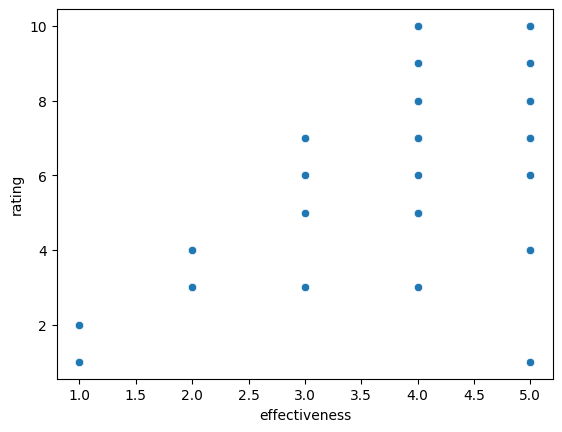

In [27]:
# It may not make sense to keep this column if it is redundant.
effectiveness_dict = {'Highly Effective':5, 'Considerably Effective':4, 'Ineffective':1,
       'Marginally Effective':2, 'Moderately Effective':3}

df['effectiveness'] = df['effectiveness'].replace(effectiveness_dict)

sns.scatterplot(data=df, x='effectiveness', y='rating')

Effectiveness does seem to have some correlation with rating but also provide different information than rating alone. There are only 109 rows with effectiveness ratings, though, and the column doesn't seem meaningful enough to keep in that case. Same with the side_effects column. Side_effects_detail and benefits columns, on the other hand, have narrative data that could be combined with reviews. 

In [28]:
df = df.drop(columns=['effectiveness', 'side_effects'])
df.columns

Index(['drug', 'rating', 'condition', 'review', 'side_effects_detail',
       'benefits', 'date'],
      dtype='object')

In [29]:
df.columns = ['drug', 'rating', 'condition', 'review', 'side_effects',
       'benefits', 'date']
df.head(3)

,drug,rating,condition,review,side_effects,benefits,date
0,vyvanse,9.0,add,I had began taking 20mg of Vyvanse for three m...,"a few experiences of nausiea, heavy moodswings...","My mood has noticably improved, I have more en...",NaN
1,dextroamphetamine,8.0,add,Switched from Adderall to Dexedrine to compare...,Dexerine IR tablets need to be taken more ofte...,Smoother more gradual onset and effect than Ad...,NaN
2,vyvanse,8.0,adhd,I have only been on Vyvanse for 2 weeks. I st...,"dry mouth, decreased appetite","Alert, awake, focused",NaN


It is unclear whether date is likely to be a useful variable, but there could hypothetically be factors such as major current events that impact the efficacy of drug treatment, so I'll keep the column for now and just take care of the null values. Drop any rows that don't even have any sort of narrative review. 

In [30]:
df.isnull().any()

drug            False
rating          False
condition       False
review           True
side_effects     True
benefits         True
date             True
dtype: bool

In [31]:
df['date'] = df['date'].fillna(0)
df.isnull().any()

drug            False
rating          False
condition       False
review           True
side_effects     True
benefits         True
date            False
dtype: bool

In [32]:
df[df.review.isnull()]

,drug,rating,condition,review,side_effects,benefits,date
7,ritalin-la,8.0,adhd,NaN,"This medication caused me to be nervous, tremb...",This medication enabled me to think clearly. ...,0


No other rows need to be dropped because all will have non-null values once side_effects and benefts get concatenated into the review column. 

**<font color='violet'>Concatenate narrative rows</font>**

In [33]:
# Null values need to be filled in order to smoothly concatenate narrative rows
df = df.fillna(' ')

In [34]:
df.head(3)

,drug,rating,condition,review,side_effects,benefits,date
0,vyvanse,9.0,add,I had began taking 20mg of Vyvanse for three m...,"a few experiences of nausiea, heavy moodswings...","My mood has noticably improved, I have more en...",0
1,dextroamphetamine,8.0,add,Switched from Adderall to Dexedrine to compare...,Dexerine IR tablets need to be taken more ofte...,Smoother more gradual onset and effect than Ad...,0
2,vyvanse,8.0,adhd,I have only been on Vyvanse for 2 weeks. I st...,"dry mouth, decreased appetite","Alert, awake, focused",0


In [35]:
df['review'] = df.review.map(str) + ' ' + df.side_effects + ' ' + df.benefits
df.review[0]

'I had began taking 20mg of Vyvanse for three months and was surprised to find that such a small dose affected my mood so effectively.  When it came to school work though I found that I needed the 30mg to increase my level of focus (and have been on it for a month since).  I had not experienced decreased appetite until about a month into taking the 20mg.  I find that the greatest benefit of Vyvanse for me is that it tends to stabalize my mood on a daily basis and lessens any bouts of anxiety and depression that i used to face before I was perscribed. a few experiences of nausiea, heavy moodswings on the days I do not take it, decreased appetite, and some negative affect on my short-term memory. My mood has noticably improved, I have more energy, experience better sleep and digestion.'

In [36]:
# String concatenation worked. I can now delete the side effects and benefits columns.
df = df.drop(columns=['side_effects', 'benefits'])
df.head(3)

,drug,rating,condition,review,date
0,vyvanse,9.0,add,I had began taking 20mg of Vyvanse for three m...,0
1,dextroamphetamine,8.0,add,Switched from Adderall to Dexedrine to compare...,0
2,vyvanse,8.0,adhd,I have only been on Vyvanse for 2 weeks. I st...,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50652 entries, 0 to 50651
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   drug       50652 non-null  object 
 1   rating     50652 non-null  float64
 2   condition  50652 non-null  object 
 3   review     50652 non-null  object 
 4   date       50652 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.9+ MB


This data is now clean and ready for further exploration and processing of the narratives. Save and pick up that work in a new notebook: https://github.com/fractaldatalearning/psychedelic_efficacy/blob/main/notebooks/2-kl-studies-nlp.ipynb

In [38]:
df.to_csv('../data/interim/studies_clean.csv')